In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\shopify_sales_data.csv')


In [3]:
df.head()

,Admin Graphql Api Id,Order Number,Billing Address Country,Billing Address First Name,Billing Address Last Name,Billing Address Province,Billing Address Zip,CITY,Currency,Customer Id,Invoice Date,Gateway,Product Id,Product Type,Variant Id,Quantity,Subtotal Price,Total Price Usd,Total Tax,Dummy Notes
0,gid://shopify/LineItem/2153619128398,1681,United States,Vanni,Wimpenny,Texas,88446,HOUSTON,USD,2865,2025-03-19 17:27:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,535.13,588.643,53.513,test123
1,gid://shopify/LineItem/2160863674446,6972,United States,Marc,Netley,Louisiana,50466,MONROE,USD,4987,2025-03-24 15:42:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,578.33,636.163,57.833,NaN
2,gid://shopify/LineItem/2157784006734,4994,United States,Elwyn,Colebourn,Texas,67432,HOUSTON,USD,5472,2025-03-22 18:32:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,594.33,653.763,59.433,NaN
3,gid://shopify/LineItem/2151551729742,206,United States,Gannie,Busst,Texas,56331,EL PASO,USD,3227,2025-03-18 10:51:00,manual,1.500000e+11,Climbing Shoes,1.470000e+12,1,487.13,535.843,48.713,NaN
4,gid://shopify/LineItem/2157085786190,4346,United States,Weston,Lomasny,Florida,70043,PANAMA CITY,USD,1874,2025-03-22 09:55:00,paypal,1.500000e+11,Climbing Shoes,1.470000e+12,1,535.13,588.643,53.513,NaN


In [4]:
#checking for null values
df.isnull().sum()

Admin Graphql Api Id             0
Order Number                     0
Billing Address Country          0
Billing Address First Name       0
Billing Address Last Name        0
Billing Address Province         0
Billing Address Zip              0
CITY                             0
Currency                         0
Customer Id                      0
Invoice Date                     1
Gateway                          0
Product Id                      11
Product Type                     0
Variant Id                       4
Quantity                         0
Subtotal Price                   0
Total Price Usd                372
Total Tax                        0
Dummy Notes                   6814
dtype: int64

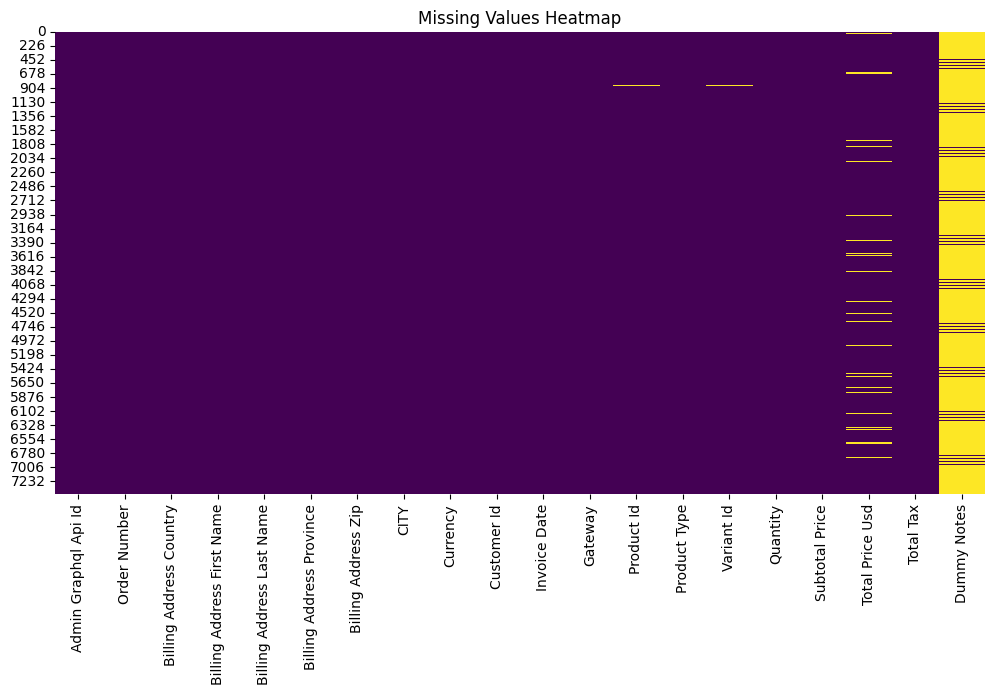

In [5]:
#visualizing null values through heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
df = df.drop_duplicates()
df.head(4)

,Admin Graphql Api Id,Order Number,Billing Address Country,Billing Address First Name,Billing Address Last Name,Billing Address Province,Billing Address Zip,CITY,Currency,Customer Id,Invoice Date,Gateway,Product Id,Product Type,Variant Id,Quantity,Subtotal Price,Total Price Usd,Total Tax,Dummy Notes
0,gid://shopify/LineItem/2153619128398,1681,United States,Vanni,Wimpenny,Texas,88446,HOUSTON,USD,2865,2025-03-19 17:27:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,535.13,588.643,53.513,test123
1,gid://shopify/LineItem/2160863674446,6972,United States,Marc,Netley,Louisiana,50466,MONROE,USD,4987,2025-03-24 15:42:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,578.33,636.163,57.833,NaN
2,gid://shopify/LineItem/2157784006734,4994,United States,Elwyn,Colebourn,Texas,67432,HOUSTON,USD,5472,2025-03-22 18:32:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,594.33,653.763,59.433,NaN
3,gid://shopify/LineItem/2151551729742,206,United States,Gannie,Busst,Texas,56331,EL PASO,USD,3227,2025-03-18 10:51:00,manual,1.500000e+11,Climbing Shoes,1.470000e+12,1,487.13,535.843,48.713,NaN


In [7]:
# Fix whitespace and casing
for col in ['CITY', 'Billing Address Province', 'Billing Address First Name']:
    df[col] = df[col].astype(str).str.strip().str.title()

In [8]:
# Fix data types
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Subtotal Price'] = pd.to_numeric(df['Subtotal Price'], errors='coerce')
df['Total Price Usd'] = pd.to_numeric(df['Total Price Usd'], errors='coerce')

In [9]:
#  Handle missing values
# Fill missing city and province with "Unknown", and Total Price Usd with median
df['CITY'].fillna("Unknown", inplace=True)
df['Billing Address Province'].fillna("Unknown", inplace=True)
df['Total Price Usd'].fillna(df['Total Price Usd'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15264\2006212660.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CITY'].fillna("Unknown", inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15264\2006212660.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [10]:
# Correct typos manually 
df['CITY'] = df['CITY'].replace({'Toronot': 'Toronto', 'New Yrok': 'New York'})
df['Billing Address Province'] = df['Billing Address Province'].replace({'Califronia': 'California', 'Ontairo': 'Ontario'})


In [11]:
# Fix dates
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')
df = df[df['Invoice Date'].notna()]  # Drop rows with invalid dates

In [12]:
#Remove irrelevant columns
df.drop(columns=['Dummy Notes'], inplace=True, errors='ignore')


In [13]:
df['CITY'] = df['CITY'].replace('Nan', np.nan)

In [14]:
# Fill with most frequent city
df['CITY'].fillna(df['CITY'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15264\1435370842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CITY'].fillna(df['CITY'].mode()[0], inplace=True)


In [15]:
df.isnull().sum()

Admin Graphql Api Id           0
Order Number                   0
Billing Address Country        0
Billing Address First Name     0
Billing Address Last Name      0
Billing Address Province       0
Billing Address Zip            0
CITY                           0
Currency                       0
Customer Id                    0
Invoice Date                   0
Gateway                        0
Product Id                    11
Product Type                   0
Variant Id                     4
Quantity                       0
Subtotal Price                 0
Total Price Usd                0
Total Tax                      0
dtype: int64

In [16]:
# Remove outliers in 'Total Price Usd' 
# Removing values above 99th percentile
threshold = df['Total Price Usd'].quantile(0.99)
df = df[df['Total Price Usd'] < threshold]

In [17]:
# Fill Product Id with mode
df['Product Id'].fillna(df['Product Id'].mode()[0], inplace=True)

# Fill Variant Id with mode
df['Variant Id'].fillna(df['Variant Id'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_15264\3248792632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Id'].fillna(df['Product Id'].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15264\3248792632.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [18]:
# Final Check
print(df.info())

print('--------'* 10)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7354 entries, 0 to 7432
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Admin Graphql Api Id        7354 non-null   object        
 1   Order Number                7354 non-null   int64         
 2   Billing Address Country     7354 non-null   object        
 3   Billing Address First Name  7354 non-null   object        
 4   Billing Address Last Name   7354 non-null   object        
 5   Billing Address Province    7354 non-null   object        
 6   Billing Address Zip         7354 non-null   int64         
 7   CITY                        7354 non-null   object        
 8   Currency                    7354 non-null   object        
 9   Customer Id                 7354 non-null   int64         
 10  Invoice Date                7354 non-null   datetime64[ns]
 11  Gateway                     7354 non-null   object        
 1

Admin Graphql Api Id          0
Order Number                  0
Billing Address Country       0
Billing Address First Name    0
Billing Address Last Name     0
Billing Address Province      0
Billing Address Zip           0
CITY                          0
Currency                      0
Customer Id                   0
Invoice Date                  0
Gateway                       0
Product Id                    0
Product Type                  0
Variant Id                    0
Quantity                      0
Subtotal Price                0
Total Price Usd               0
Total Tax                     0
dtype: int64

## Orders by Province 

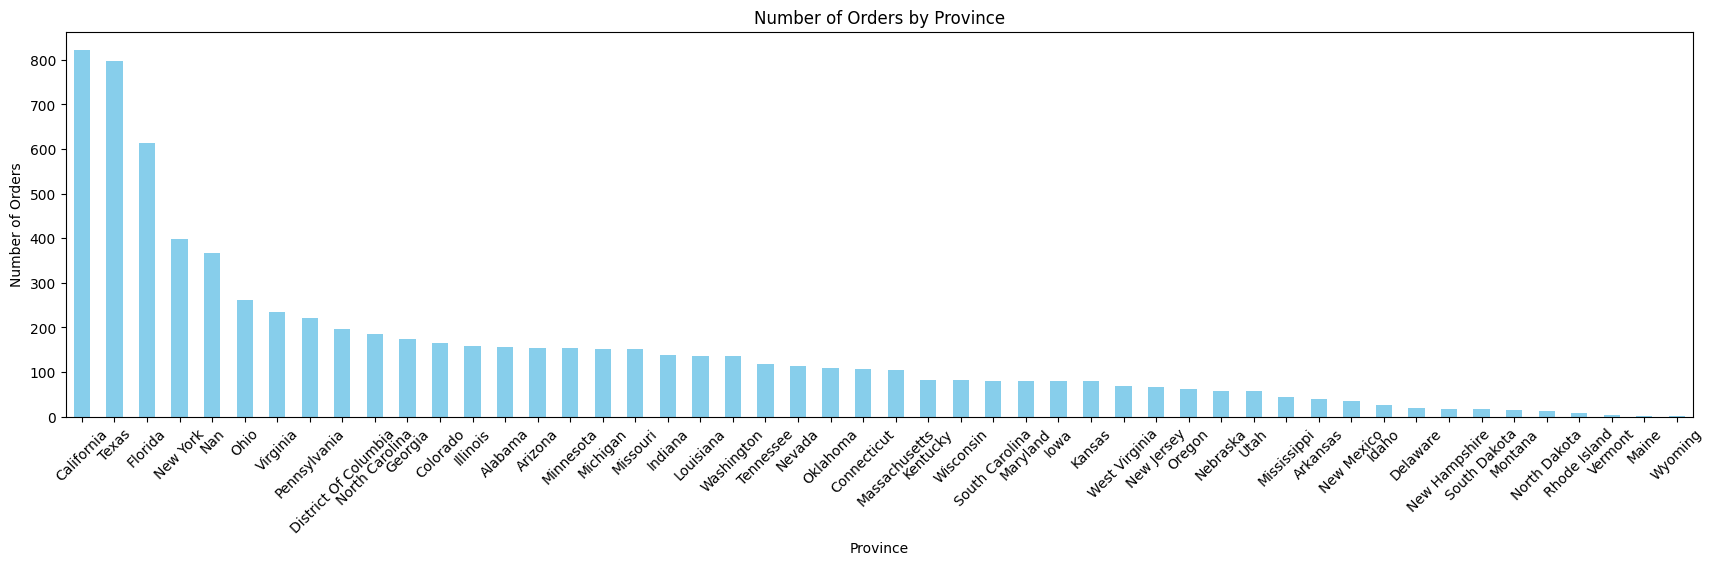

In [19]:
plt.figure(figsize=(21, 5))
df['Billing Address Province'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Orders by Province")
plt.xlabel("Province")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


## top 10 cities by total sales

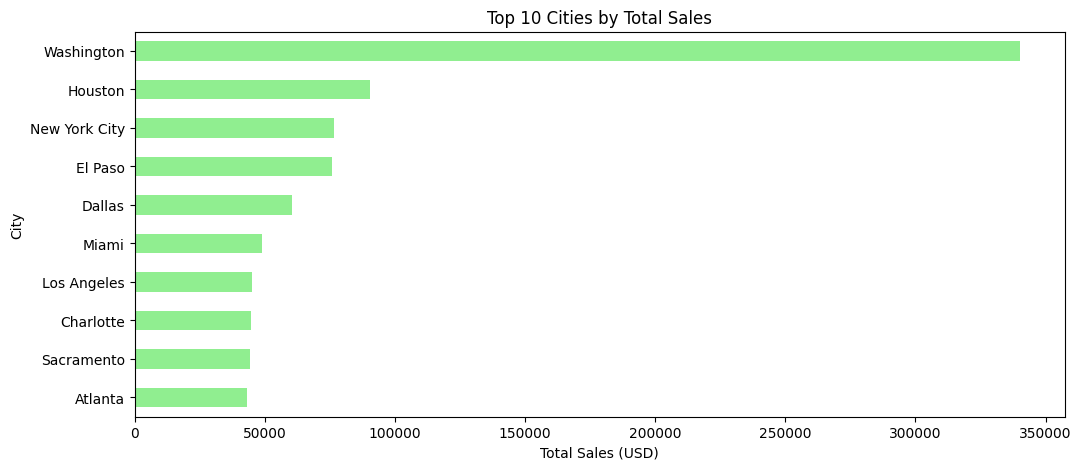

In [20]:
# Drop missing CITY values before grouping
top_cities = df[df['CITY'].notna()].groupby('CITY')['Total Price Usd'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 5))
top_cities.plot(kind='barh', color='lightgreen')
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.show()



## Total Sales Over Time

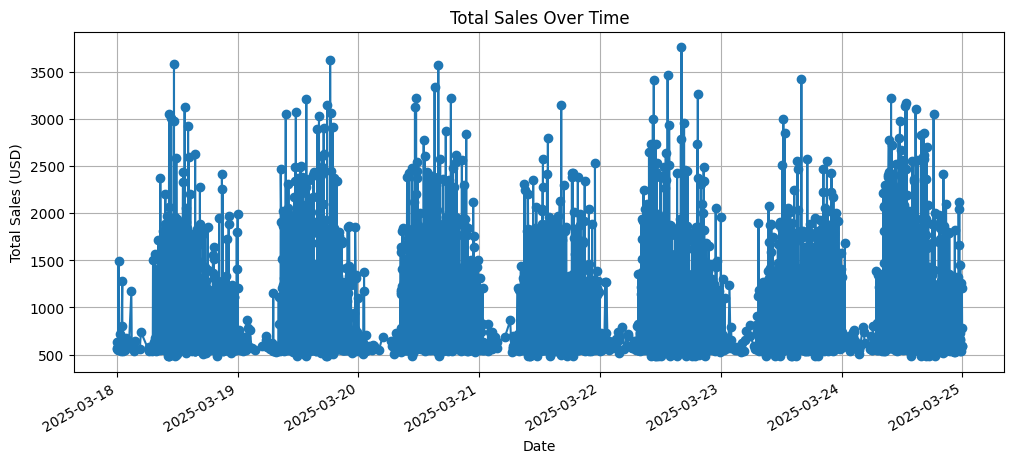

In [21]:
sales_trend = df.groupby('Invoice Date')['Total Price Usd'].sum()

plt.figure(figsize=(12, 5))
sales_trend.plot(marker='o', linestyle='-')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()


 ## Correlation Heatmap

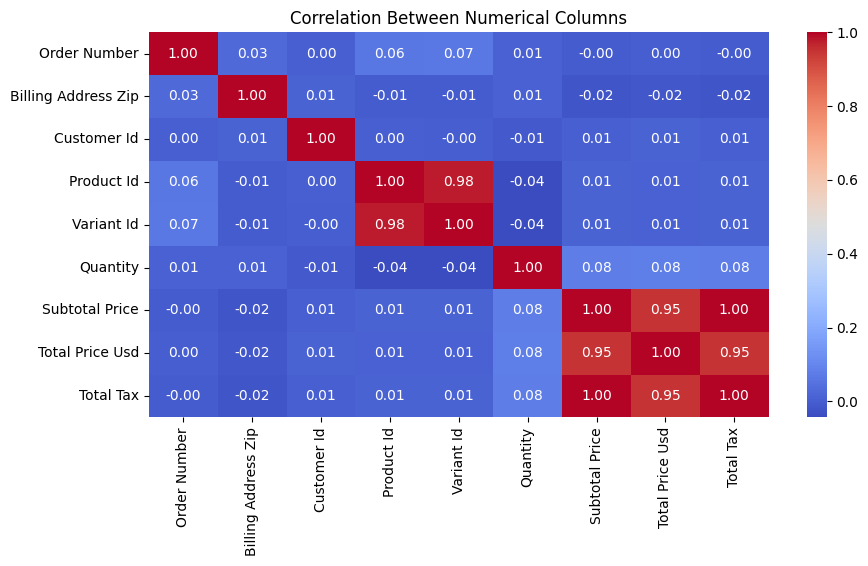

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numerical Columns")
plt.show()


# Conclusion

In [ ]:

- Successfully cleaned a messy Shopify sales dataset containing missing values, inconsistent formatting, typos, duplicate records, and outliers.
- Performed exploratory data analysis (EDA) with visualizations to uncover key insights such as top cities by sales, sales trends over time, and order quantity distributions.
- The cleaned data was later used for building a Power BI dashboard (notebook linked to real dashboard work).
- This project demonstrates real-world data preprocessing and is designed to match a business use-case.
